In [ ]:
#USING RANDOM FOREST CLASSIFIER TO PREDICT FOR RAINFALL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score

In [ ]:
data = pd.read_csv('weatheraus.csv')

In [ ]:
data = data.drop(['Date'], axis=1)

In [ ]:
# Drop the 'Date' and 'Location' columns as they are not useful for the prediction
data = data.drop(['Location'], axis=1)

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
data = pd.get_dummies(data, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary (1 for 'Yes', 0 for 'No')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8182
           1       1.00      1.00      1.00      2371

    accuracy                           1.00     10553
   macro avg       1.00      1.00      1.00     10553
weighted avg       1.00      1.00      1.00     10553



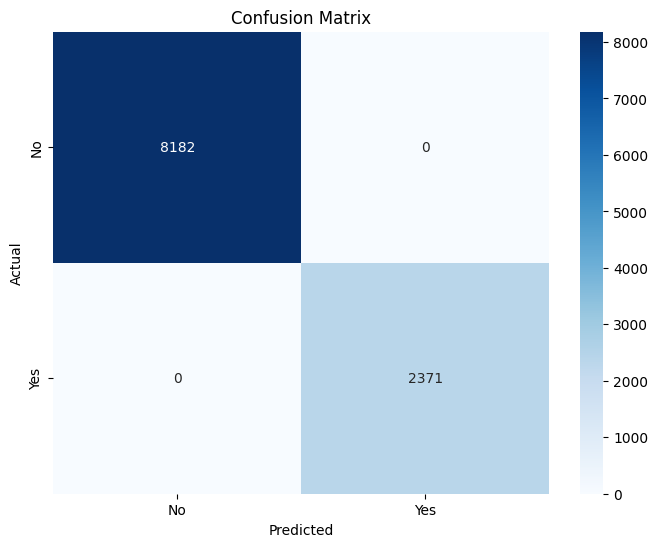

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()